In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [2]:
#load dataset
df=pd.read_csv("/content/thyroid_cancer_risk_data.csv")

In [3]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [4]:
df.shape

(212691, 17)

#***EDA(Explotary Data Analysis):-***

In [5]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [6]:
#drop the unncessary dataset
df.drop('Patient_ID',axis=1,inplace=True)

In [7]:
#dataset describe
df.describe()

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,51.918497,5.045102,2.001727,8.246204,2.503403
std,21.632815,2.860264,0.866248,2.164188,1.444631
min,15.000000,0.100000,0.500000,4.500000,0.000000
25%,33.000000,2.570000,1.250000,6.370000,1.250000
50%,52.000000,5.040000,2.000000,8.240000,2.510000
75%,71.000000,7.520000,2.750000,10.120000,3.760000
max,89.000000,10.000000,3.500000,12.000000,5.000000


In [8]:
#check the missing values
df.isnull().sum()

,0
Age,0
Gender,0
Country,0
Ethnicity,0
Family_History,0
Radiation_Exposure,0
Iodine_Deficiency,0
Smoking,0
Obesity,0
Diabetes,0


In [9]:
#check the duplicated rows
df.duplicated().sum()

0

In [10]:
#categorical column list
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')

In [11]:
#numerical column list
num_col=df.select_dtypes(include='number').columns
num_col

Index(['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size'], dtype='object')

#***Data Visualization:-***

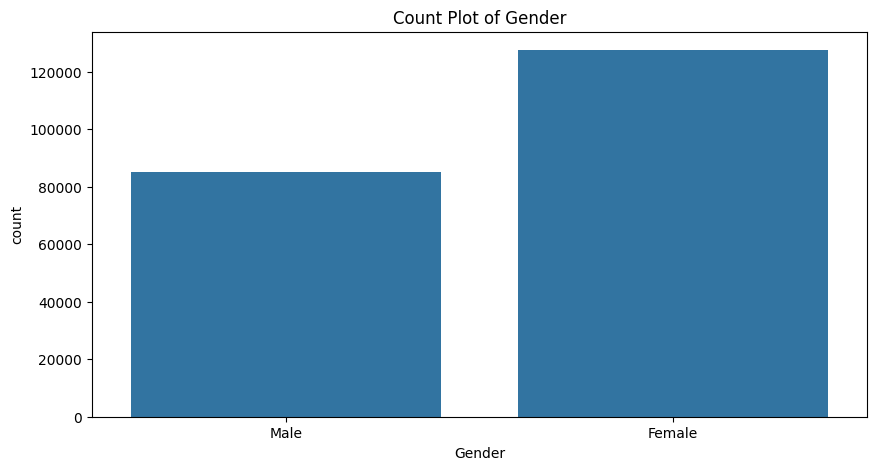

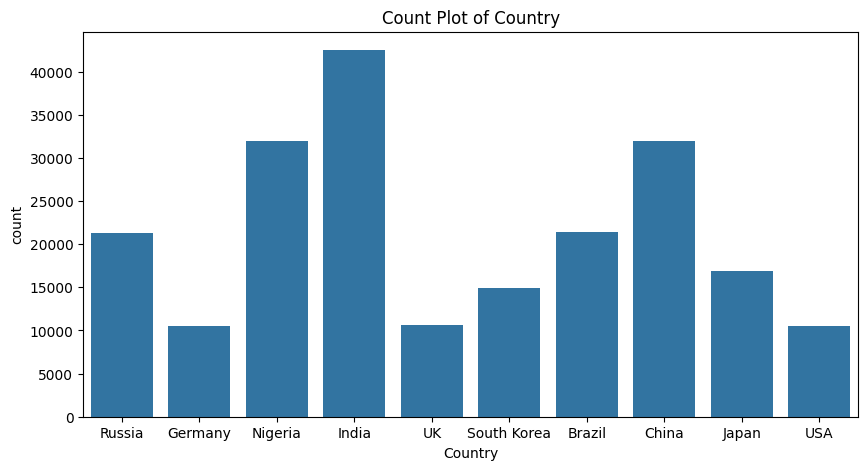

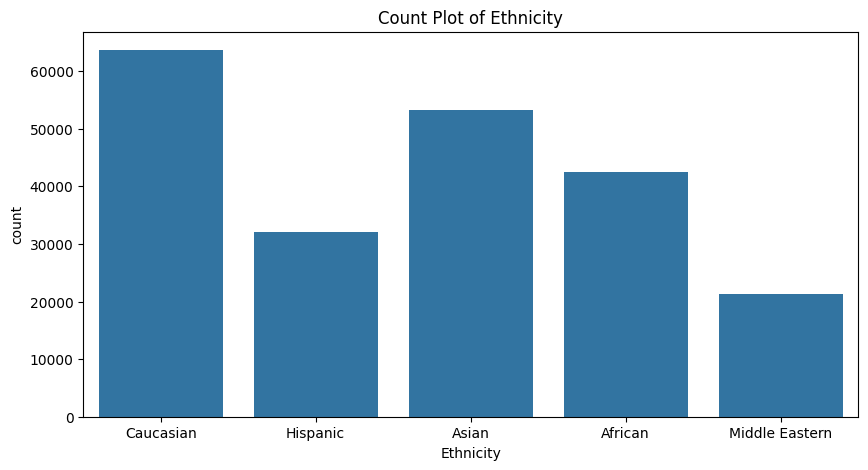

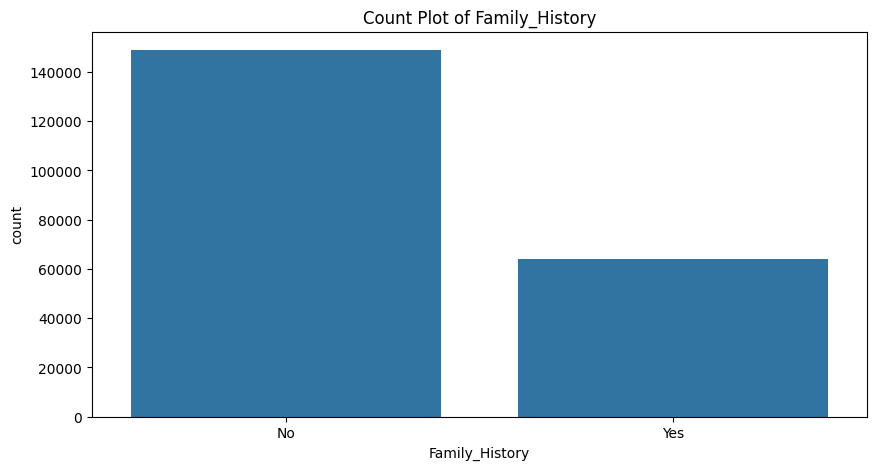

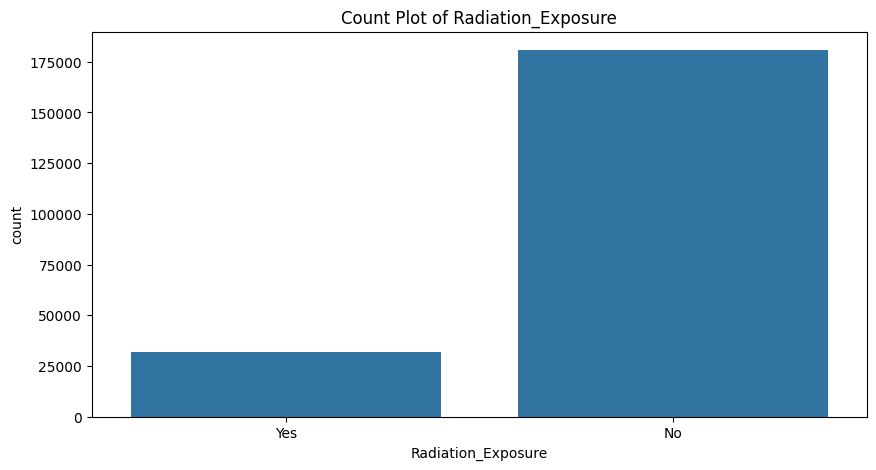

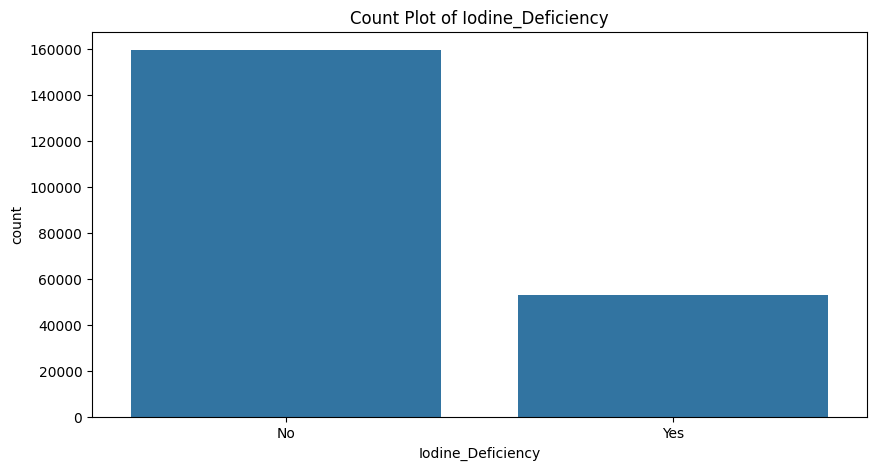

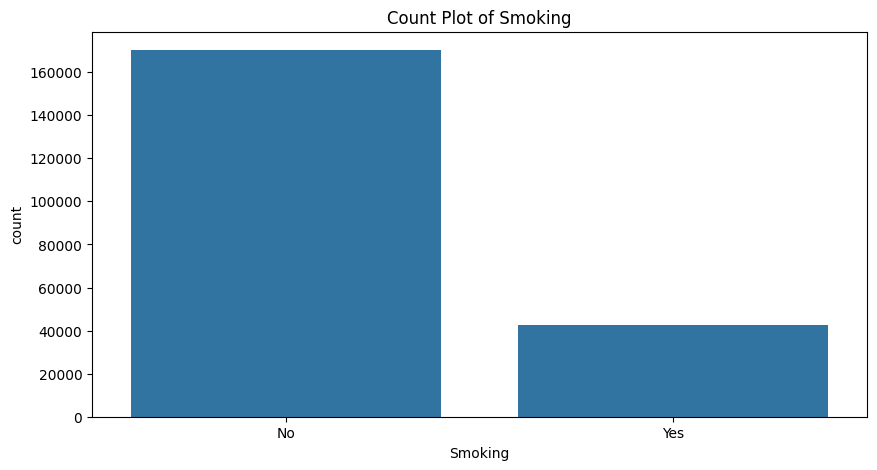

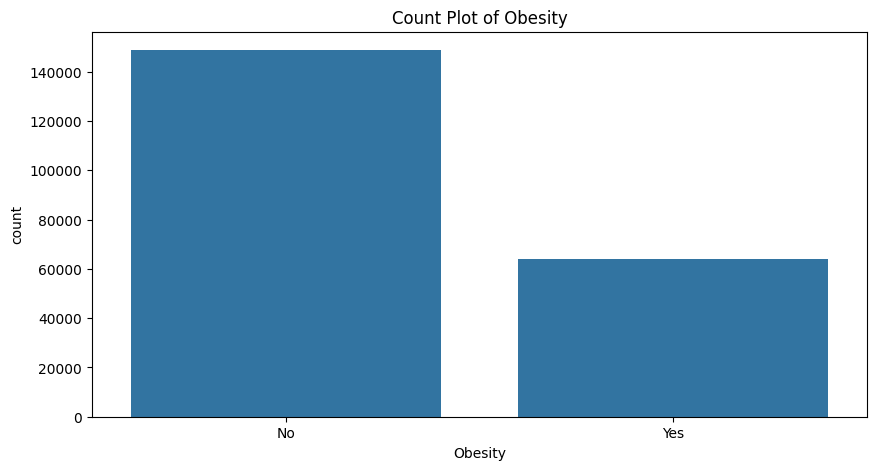

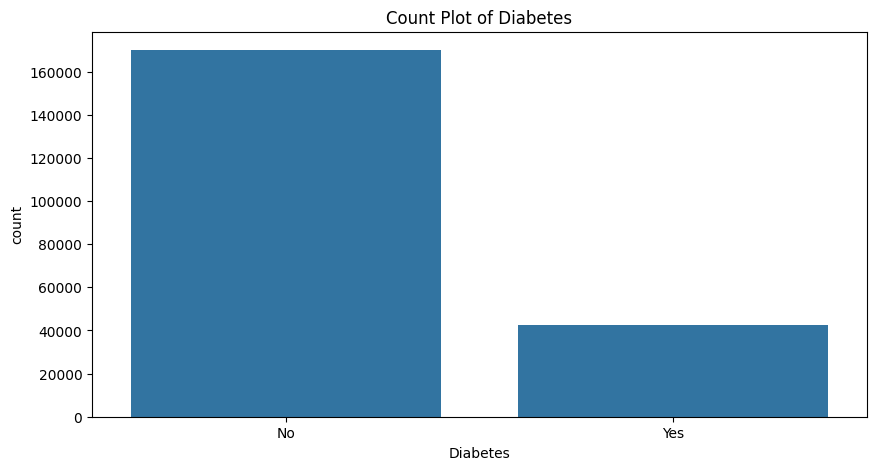

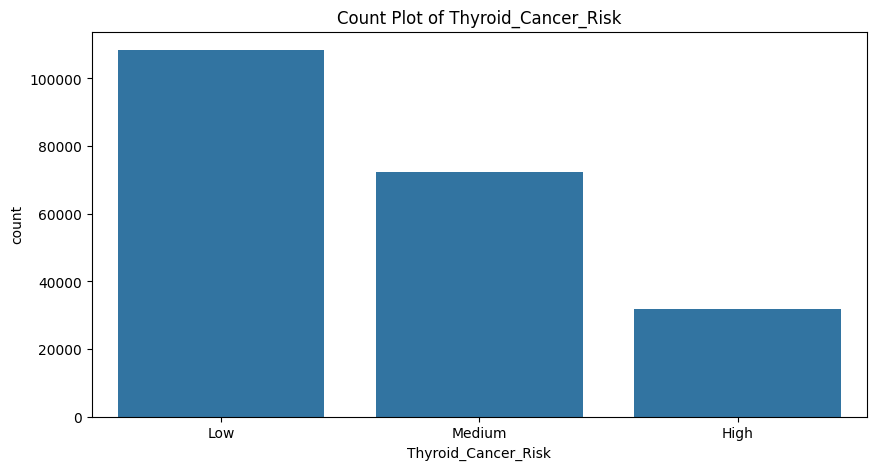

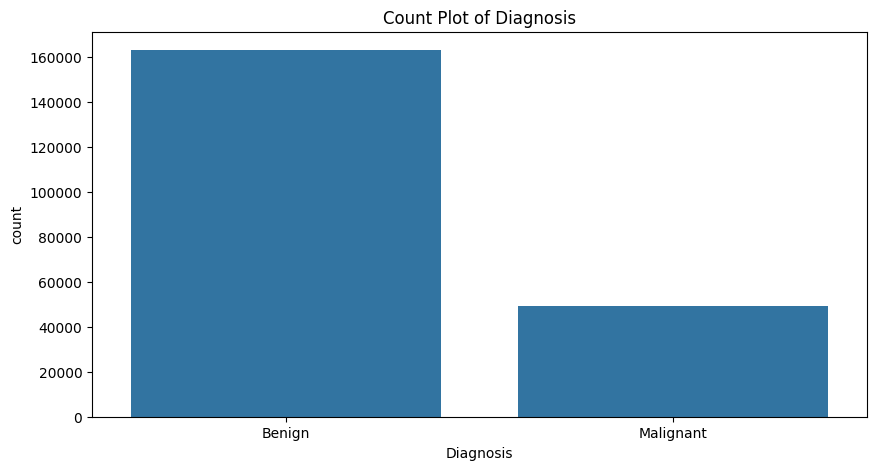

In [12]:
#data visualization on the categorical column
for i in cat_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x=df[i])
  plt.title(f'Count Plot of {i}')
  plt.show()

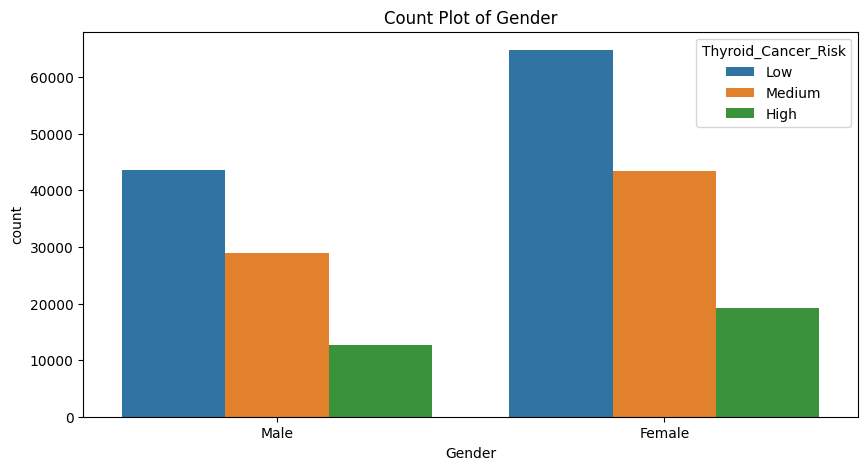

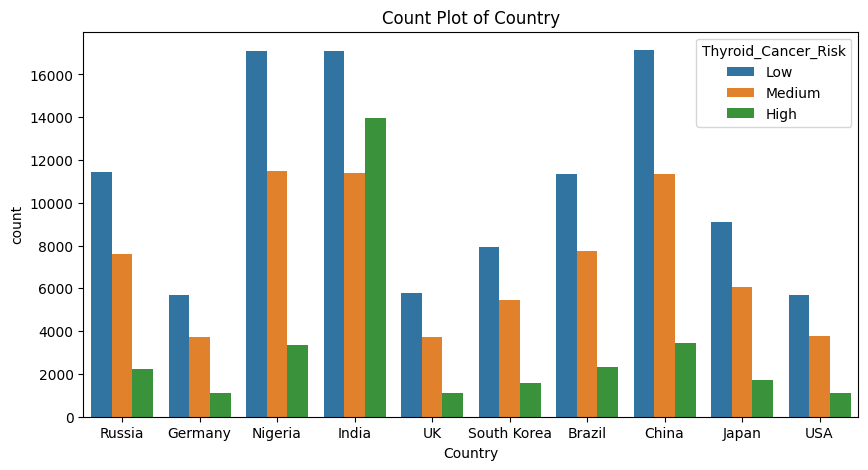

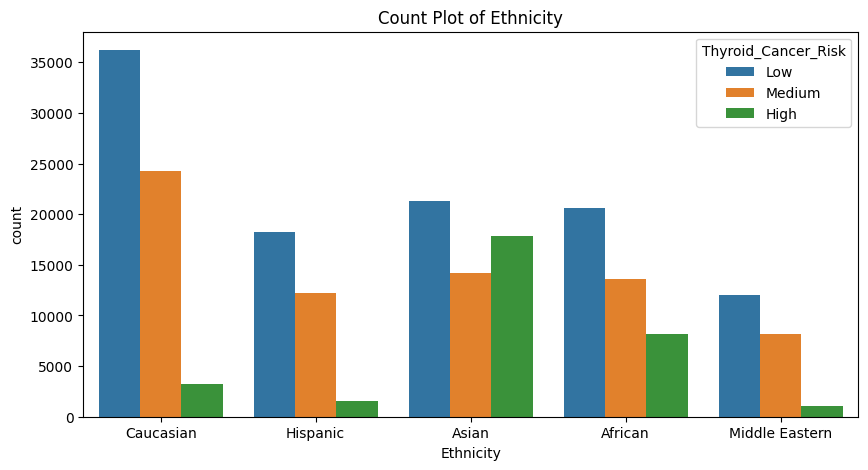

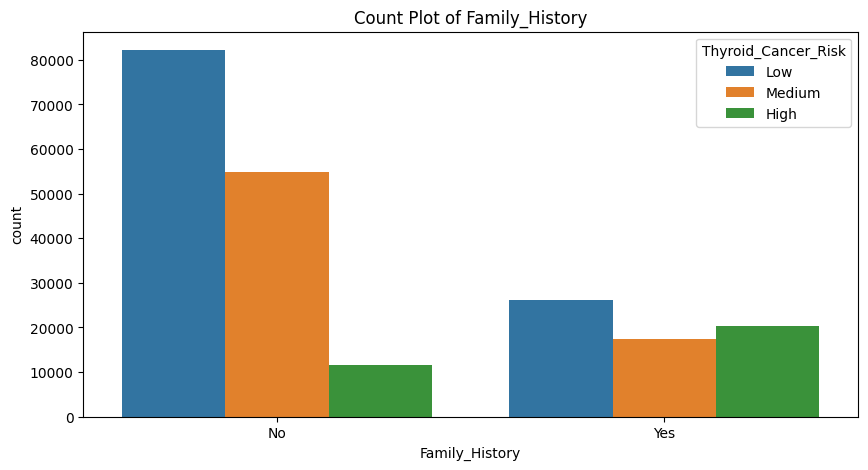

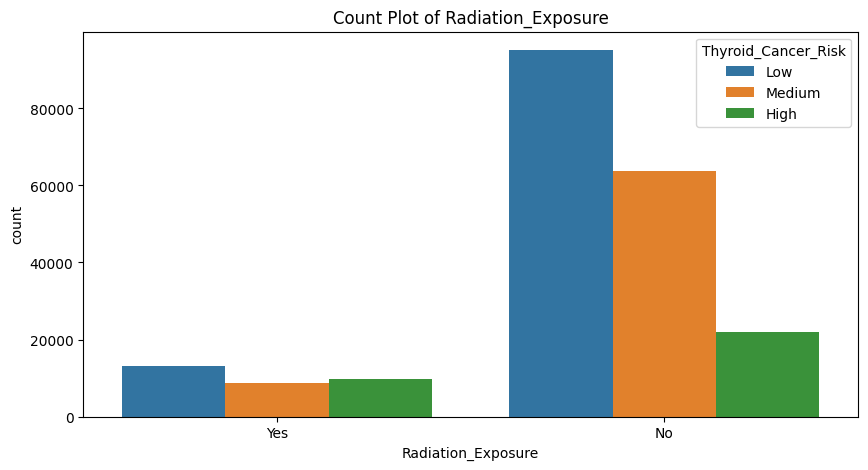

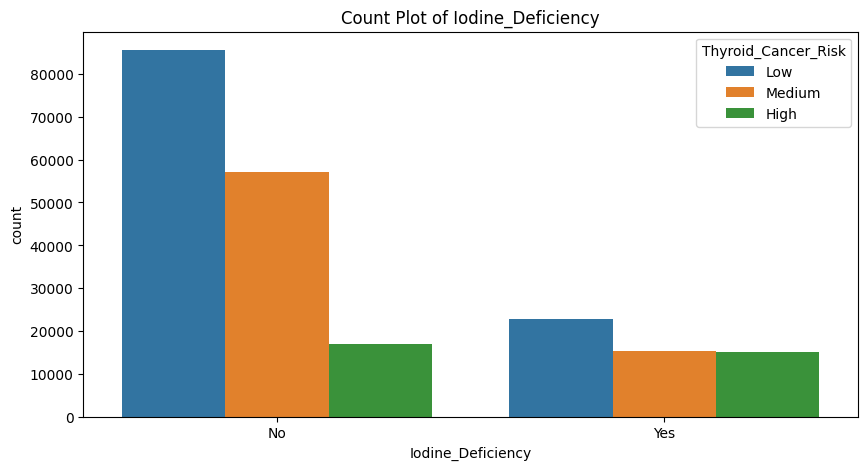

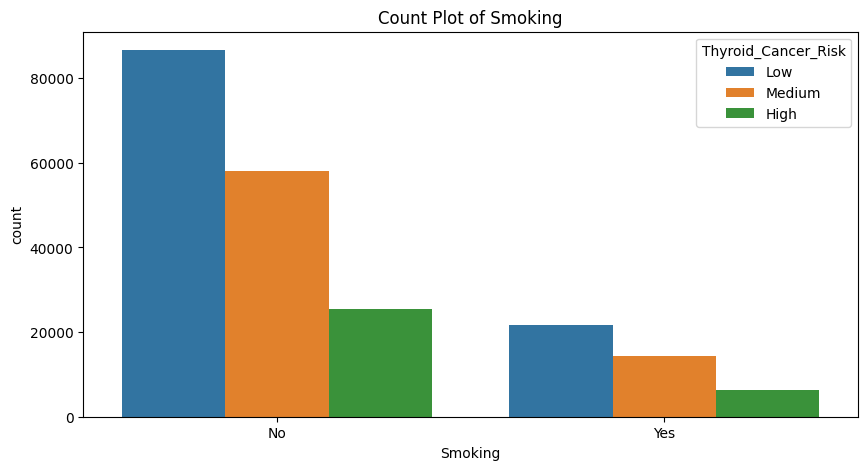

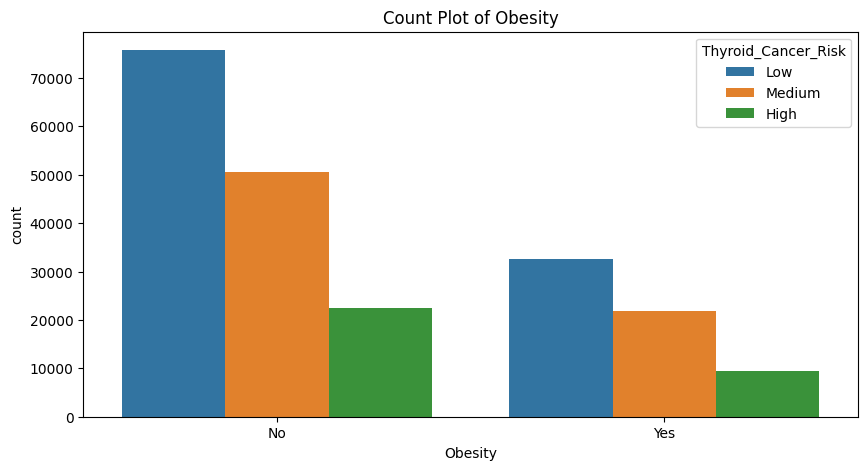

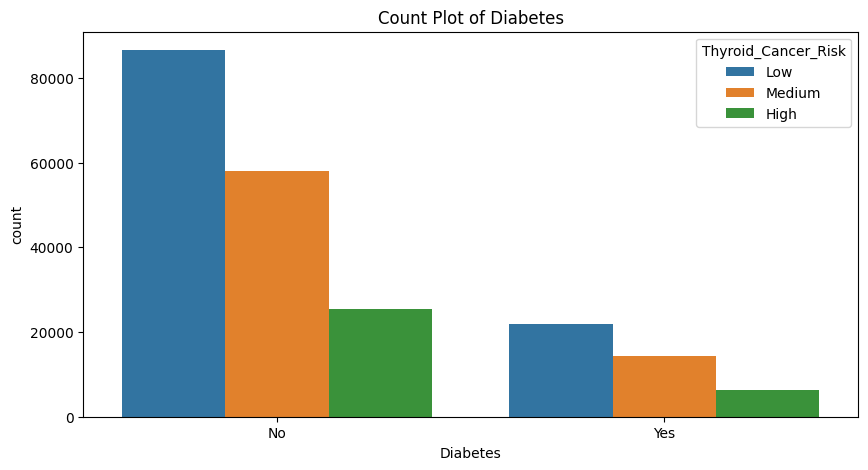

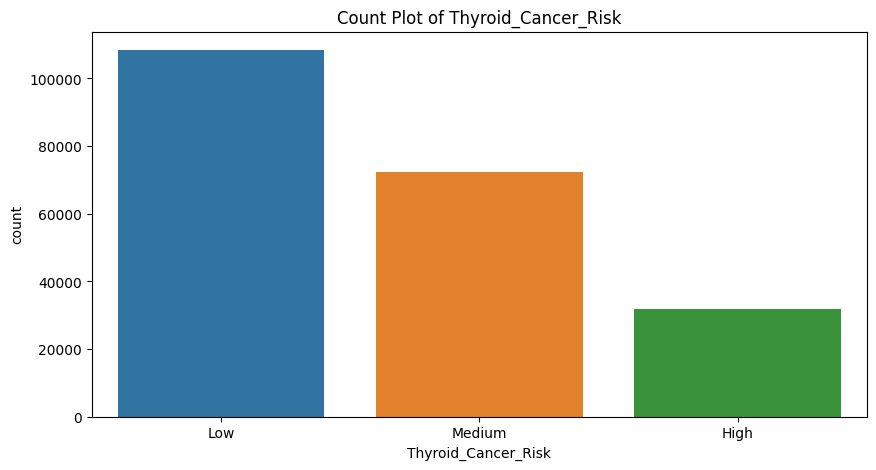

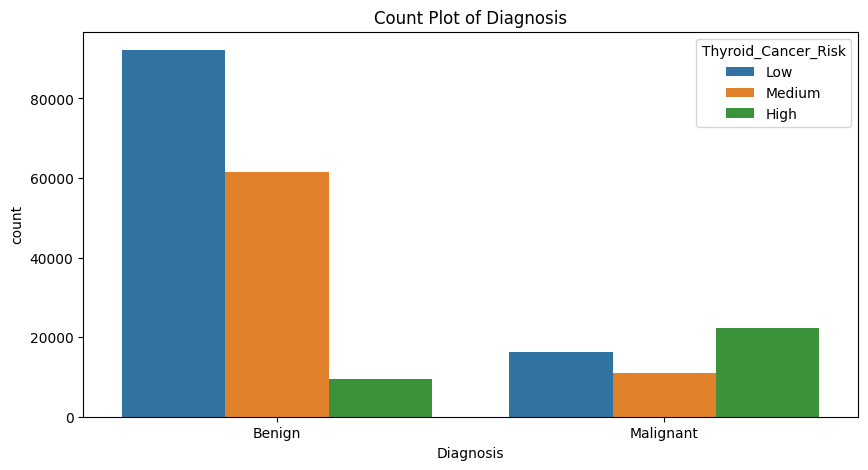

In [13]:
#comapare with target column
for col in cat_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x=df[col],hue=df['Thyroid_Cancer_Risk'])
  plt.title(f'Count Plot of {col}')
  plt.show()

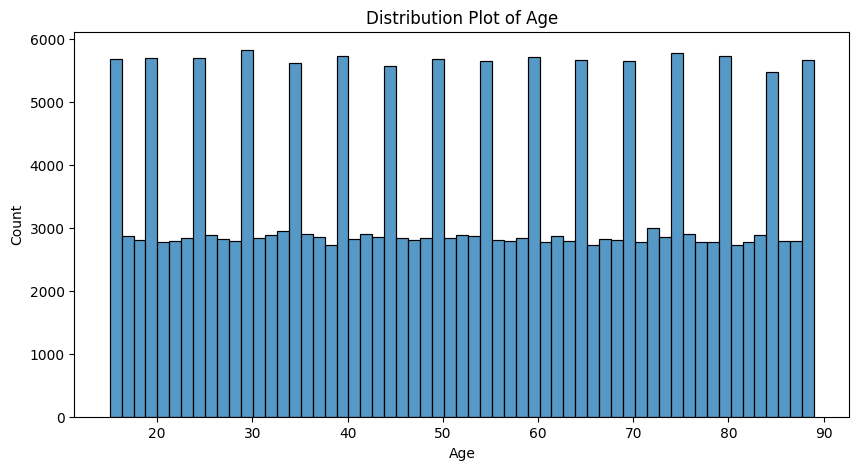

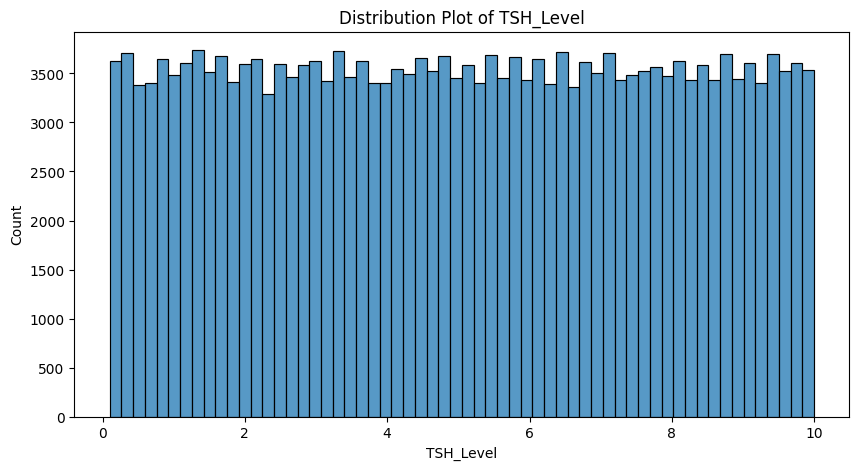

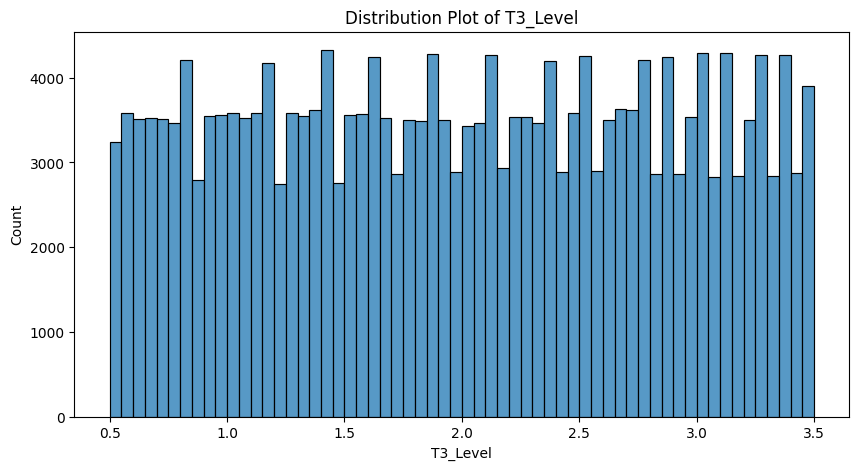

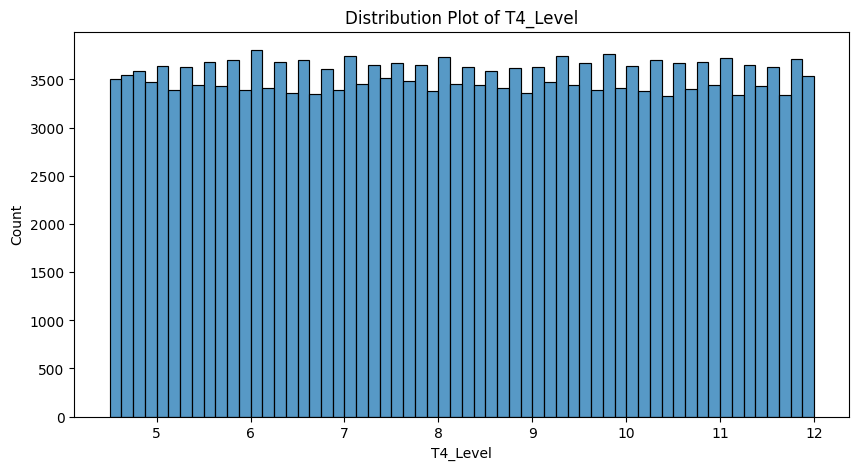

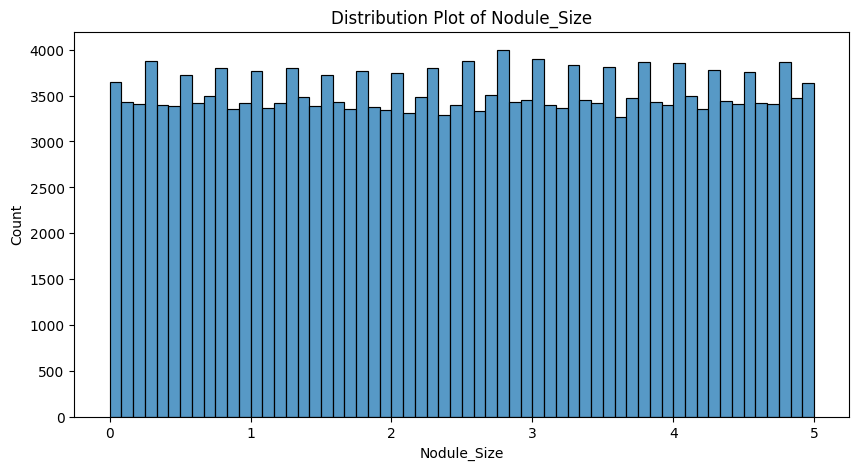

In [14]:
#data visualization numerical column
for i in num_col:
  plt.figure(figsize=(10,5))
  sns.histplot(df[i])
  plt.title(f'Distribution Plot of {i}')
  plt.show()

#***Drop the Uncessary columns:-***

In [15]:
df.drop(columns=['Country', 'Ethnicity', 'Diagnosis'], inplace=True)

In [16]:
#shape dataset
df.shape

(212691, 13)

In [17]:
cate_col=df.select_dtypes(include='object').columns
cate_col

Index(['Gender', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency',
       'Smoking', 'Obesity', 'Diabetes', 'Thyroid_Cancer_Risk'],
      dtype='object')

In [18]:
df.columns

Index(['Age', 'Gender', 'Family_History', 'Radiation_Exposure',
       'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'TSH_Level',
       'T3_Level', 'T4_Level', 'Nodule_Size', 'Thyroid_Cancer_Risk'],
      dtype='object')

#***Encoding:-***

In [19]:
le=LabelEncoder()
encoder={}
for col in cate_col:
  df[col]=le.fit_transform(df[col])
  encoder[col] = le

#***Correlation:-***

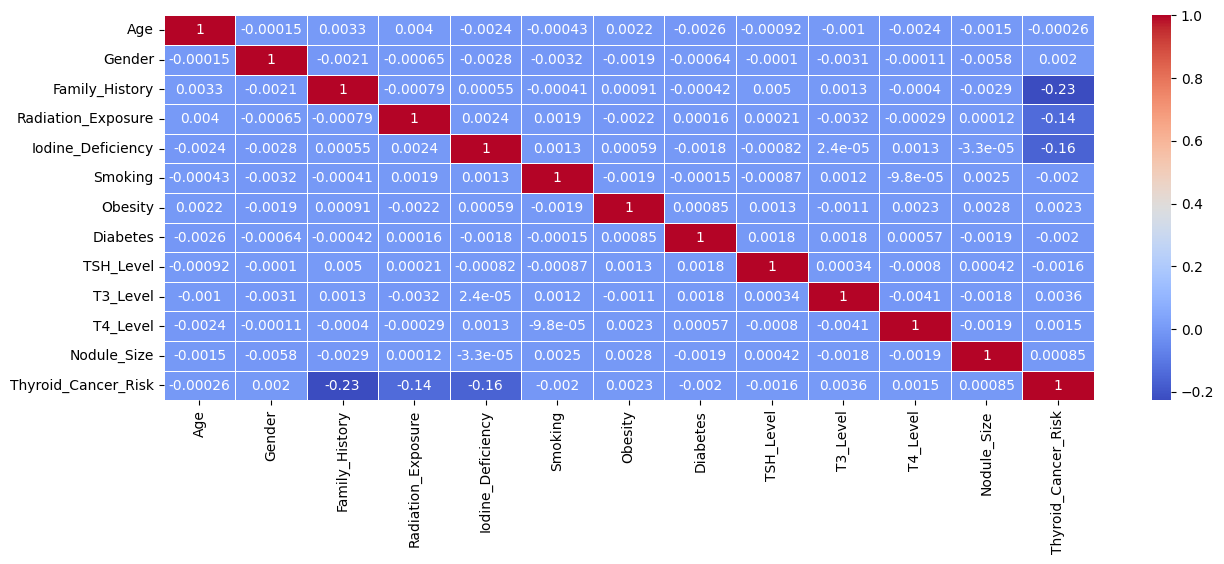

In [20]:
#correlation
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.7)
plt.show()

#***Spliting in to X,y:-***

In [33]:
X=df.drop('Thyroid_Cancer_Risk',axis=1)
y=df['Thyroid_Cancer_Risk']

In [34]:
y.value_counts()

,count
Thyroid_Cancer_Risk,
1,108388
2,72400
0,31903


#***Balancing Target Column:-***

In [53]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X,y=sm.fit_resample(X,y)

In [54]:
y.value_counts()

,count
Thyroid_Cancer_Risk,
1,108388
2,108388
0,108388


#***Spliting In to Train and Test:-***

In [55]:
#spliing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
#shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((260131, 12), (65033, 12), (260131,), (65033,))

#***Building Model:-***

In [57]:
model=RandomForestClassifier(random_state=42,n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [58]:
#prediction
y_pred=model.predict(X_test)

In [59]:
#evaluate model performance
print("Classification_report:-",classification_report(y_test,y_pred))
print("Confusion matrix:-",confusion_matrix(y_test,y_pred))
print("Accuracy Score:-",accuracy_score(y_test,y_pred))

Classification_report:-               precision    recall  f1-score   support

           0       0.63      0.85      0.72     21595
           1       0.52      0.40      0.45     21968
           2       0.57      0.51      0.54     21470

    accuracy                           0.58     65033
   macro avg       0.57      0.59      0.57     65033
weighted avg       0.57      0.58      0.57     65033

Confusion matrix:- [[18278  2089  1228]
 [ 6122  8754  7092]
 [ 4591  5926 10953]]
Accuracy Score:- 0.5840880783602171


#***Save Model and Encoder:-***

In [61]:
import joblib
joblib.dump(model,'model.pkl')
joblib.dump(encoder,'encoder.pkl')
print("save model sucessfully")

save model sucessfully
